In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np

In [3]:
dataset_folder = r'C:\NewPythonVS\dsss_hw_4\Mini_BAGLS_dataset'
image_files = [f for f in os.listdir(dataset_folder) if f.endswith('.png') and not f.endswith('_seg.png')]
seg_files = [f for f in os.listdir(dataset_folder) if f.endswith('_seg.png')]
meta = [f for f in os.listdir(dataset_folder) if f.endswith('.meta')]

In [4]:
#Sorting in ascending order
def numerical_sort(file_list):
    return sorted(file_list, key=lambda x: int(x.split('_')[0].replace('.png', '')))

def sort_meta(file_list):
    return sorted(file_list, key=lambda x: int(x.split('_')[0].replace('.meta', '')) if '.meta' in x else x)

image_files = numerical_sort(image_files)
seg_files = numerical_sort(seg_files)
meta = sort_meta(meta)

In [5]:
#Function to retrieve the meta data
meta_data_list = []
for meta_file in meta:
    meta_file_path = os.path.join(dataset_folder, meta_file)
    with open(meta_file_path, 'r') as file:
        meta_content = json.load(file)
        meta_data_list.append(meta_content)

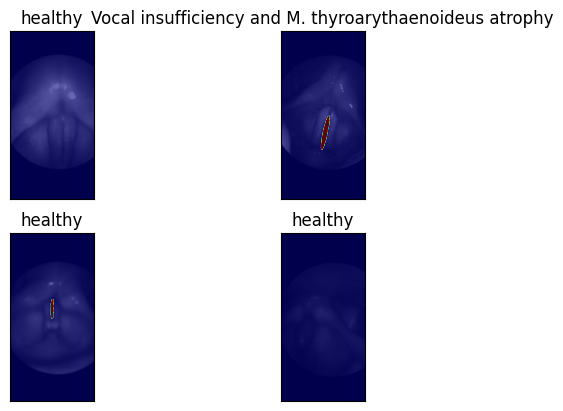

In [6]:
for i in range(4):
        # Choosing a random index
        index = random.randint(0, 99)

        # Loading the image
        image_path = os.path.join(dataset_folder, image_files[index])
        image = cv2.imread(image_path)

        # Load segmentation mask
        mask_path = os.path.join(dataset_folder, seg_files[index])
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        current_meta_data = meta_data_list[index]

        # Displaying the image and mask
        plt.subplot(2, 2, i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.xticks([])
        plt.yticks([]) 
        plt.title(f"{current_meta_data.get('Subject disorder status')}")
        
        plt.subplot(2, 2, i + 1)
        plt.imshow(mask, cmap='jet', alpha=0.6)
        plt.xticks([]) 
        plt.yticks([]) 


       
plt.show()


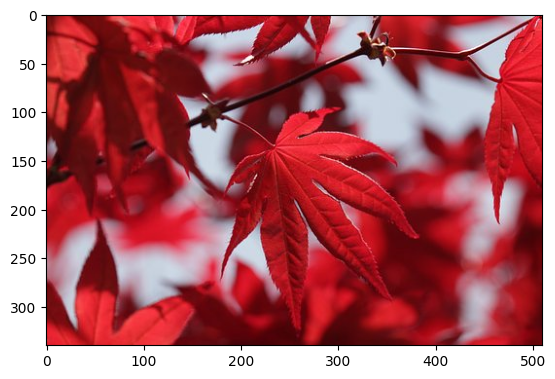

In [7]:
leaves_path = "C:\\NewPythonVS\\dsss_hw_4\\leaves.jpg"
leaves = cv2.imread(leaves_path)
plt.imshow(cv2.cvtColor(leaves, cv2.COLOR_BGR2RGB))


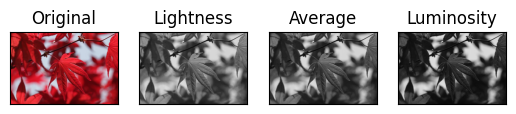

In [8]:

# # Convert RGB to Grayscale using average method
gray_avg = np.mean(leaves[...,:3], axis=-1)

# # Convert RGB to Grayscale using luminosity method
gray_luminosity = np.dot(leaves[..., :3], [0.2989, 0.5870, 0.1140])

# # Convert RGB to Grayscale using lightness method
gray_light = (np.min(leaves[...,:3], axis=-1)/2.0 + np.max(leaves[...,:3], axis=-1)/2.0)

# Display the original RGB image and three grayscale variations side by side
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(leaves, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])
 
plt.subplot(1, 4,3)
plt.imshow(gray_avg, cmap='gray')
plt.title('Average')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 4)
plt.imshow(gray_luminosity, cmap='gray')
plt.title('Luminosity')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 2)
plt.imshow(gray_light, cmap='gray')
plt.title('Lightness')
plt.xticks([])
plt.yticks([])

plt.show()

